##### 【 ML - 생선 분류 모델 만들기 1 】
- 주__제 : 2개 종류 생선 분류 모델 만들기
- 데이터 : ../DATA/fish.csv
- 피쳐들 : 길이와 무게. 실수형
- 타__겟 : 생선 종류
- 학습종류 : 지도학습 -> 분류
- 학습방법 : 다양한 분류 알고리즘들 => KNN 최근접이웃알고리즘

[1] 데이터 확인 : 피쳐와 타겟 <hr>

In [14]:
## [1-1] 모듈 로딩 및 데이터 준비
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

## ML 학습 알고리즘 - neighbors 계열
from sklearn.neighbors import KNeighborsClassifier

In [15]:
## Cow 기능 활성화 : 데이터 변경시 복사 후 처리
## copy오류는 뜨는데 계속 copy하면 메모리 낭비니깐 이런 방법으로 해결함
if not pd.get_option('copy_on_write'):
    pd.options.mode.copy_on_write = True
    print(f"CoW : {pd.get_option('copy_on_write')}")

In [16]:
## [1-2] 데이터 로딩
DATA_FILE = '../DATA/fish.csv'

## 품종, 무게, 길이 컬럼만 추출
allDF = pd.read_csv(DATA_FILE, usecols=[0,1,2])
display(allDF.head(3))

## Bream 도미, Smelt 빙어 행만 추출
fishDF = allDF[(allDF.Species == 'Bream') | (allDF.Species == 'Smelt')]

## 인덱스 정리
fishDF.reset_index(drop=True, inplace=True)
display(fishDF.head(3), fishDF.tail(3))
fishDF.info()

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5


,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5


,Species,Weight,Length
46,Smelt,12.2,13.0
47,Smelt,19.7,14.3
48,Smelt,19.9,15.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  49 non-null     object 
 1   Weight   49 non-null     float64
 2   Length   49 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


In [ ]:
# 품종 컬럼 타입 변환 저장
speciesSR = fishDF.Species
fishDF.Species = speciesSR.astype('category')

In [19]:
fishDF.info()

## 카테고리 접근자 cat 사용
print(f'[categories] => {fishDF.Species.cat.categories}')
print(f'[codes]      => {fishDF.Species.cat.codes}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Species  49 non-null     category
 1   Weight   49 non-null     float64 
 2   Length   49 non-null     float64 
dtypes: category(1), float64(2)
memory usage: 1.1 KB
[categories] => Index(['Bream', 'Smelt'], dtype='object')
[codes]      => 0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    1
48    1
dtype: int8


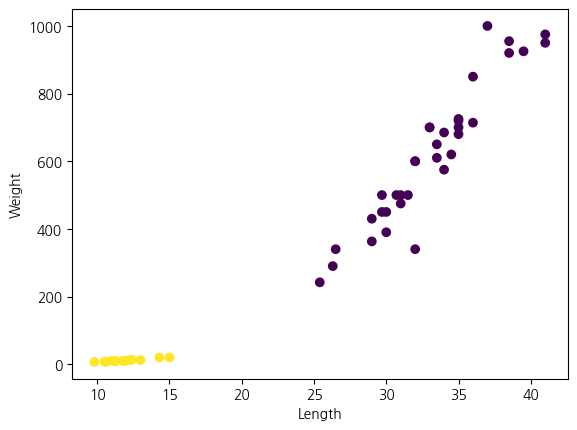

,Weight,Length
Weight,1.000000,0.960347
Length,0.960347,1.000000


In [21]:
# 시각화 : 산점도 => 색상을 품종에 따라 다르게 설정 c 매개변수
plt.scatter(fishDF.Length, fishDF.Weight, c = fishDF.Species.cat.codes)
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

# 상관계수
fishDF.corr(numeric_only=True)

[2] 피쳐/데이터와 타켓/라벨 분리 <hr>

In [22]:
## 학습용 피쳐/데이터와 타겟/라벨 분리
## -> 피쳐/데이터 : 2D
featureDF = fishDF[fishDF.columns[1:]]

## -> 타겟/라벨 : 1D
targetSR  = fishDF[fishDF.columns[0]]

print(f'featureDF : {featureDF.shape} / {featureDF.ndim}D,  targetSR : {targetSR.shape} / {targetSR.ndim}D')

featureDF : (49, 2) / 2D,  targetSR : (49,) / 1D


[3] 학습 진행 <hr>

In [24]:
## - 모델 인스턴스 생성
kModel = KNeighborsClassifier()
kModel

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [26]:
## - 학습 진행 : 학승용 데이터(2D)와 타겟(1D)
## - KNN 학습 알고리즘은 메모리에 데이터와 타겟 로딩만 진행
kModel.fit(featureDF, targetSR)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


[4] 평가진행 : 테스트용 데이터/피쳐와  타겟 <hr>
- 학습용 데이터 평가 결과 테스트용 데이터 평가 결과 비교  =>> 이건 정답만 외운건지 이해한건지 확인하기 위해서 비교하는거임

In [27]:
kModel.score(featureDF, targetSR)
## 여기서 1.0 즉 100점짜리 모델이라고 나왔으니깐, 바다에서 아무 생선 잡아서 길이랑 무게 넣으면 무조건 맞는 답이 나와야함 

1.0

[5] 모델 활용 서비스 <hr>

In [31]:
## 아무 도미 또는 빙어의 길이/무게 ==> 도미와 빙어를 예측
new_data = pd.DataFrame([[278.3, 29]], columns=fishDF.columns[1:])

kModel.predict(new_data)

array(['Bream'], dtype=object)

In [39]:
in_data = input('생선의 무게와 길이 입력(ex] 273 29)').strip().split()
## 형 변환 ------------------------------------------
# 방법 1
in_data = [ float(i) for i in in_data ]
# 방법 2
# list(map(float, in_data))
# ---------------------------------------------------
kModel.predict([in_data])

c:\Users\qjadl\anaconda3\envs\ML_311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Bream'], dtype=object)